In [1]:
import warnings

warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

In [70]:
# Basic data manipulation
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

In [52]:
data = pd.read_csv("Corr NORT.csv", sep=";").iloc[1:]
data.columns = ["freq", "lat", "cond"]
data["freq"] = data["freq"].astype(float)
data["lat"] = data["lat"].astype(float)

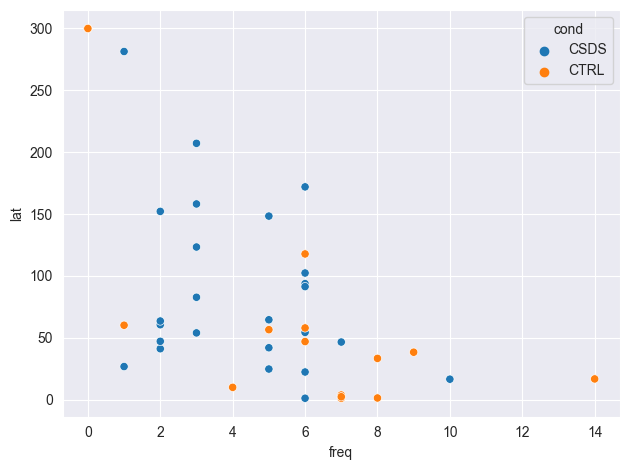

In [53]:
sns.scatterplot(data=data, x="freq", y="lat", hue="cond")
plt.tight_layout()
plt.show()

In [54]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=2)
novel_object_pcs = PCA.fit_transform(data[["freq", "lat"]])

In [55]:
data["novel_object_pc1"] = novel_object_pcs[:, 0]
data["novel_object_pc2"] = novel_object_pcs[:, 1]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CSDS vs. CTRL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.403e-02 U_stat=1.295e+02


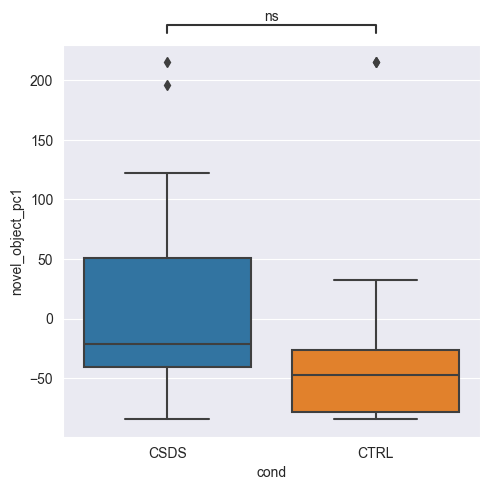

In [79]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.boxplot(data=data, x="cond", y="novel_object_pc1", ax=ax)

# Add statistic annotation
pairs = [("CTRL", "CSDS")]
annotator = Annotator(ax, pairs, data=data, x="cond", y="freq")
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.tight_layout()
plt.show()